<a href="https://colab.research.google.com/github/Khosyi0/VeggieVision/blob/main/Machine%20Learning/VeggieVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports
Import Semua Kebutuhan Library

In [ ]:
import os
import shutil
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
from sklearn.model_selection import train_test_split

## Collect Dataset
Mount Drive karena dataset disimpan di google drive

*(Jalankan kalo pake google colab, kalo pake google colab, jangan lupa upload dulu datasetnya ke google drive. Terus jangan lupa set source_path nya dengan sesuai)*

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Explore Dataset
Copy Dataset ke Direktori baru, buat jaga-jaga biar dataset utamanya aman.

In [ ]:
# Path ke folder induk
parent_folder = os.getcwd()

# Nama folder sumber dan target
source_folder = os.path.join(parent_folder, "/content/drive/MyDrive/NewDatasetClear")
target_folder = os.path.join(parent_folder, "VeggieVisionReady")

# Membuat folder target jika tidak ada
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Menyalin isi folder sumber ke folder target
for item in os.listdir(source_folder):
    source_item = os.path.join(source_folder, item)
    target_item = os.path.join(target_folder, item)
    if os.path.isdir(source_item):
        shutil.copytree(source_item, target_item)
    else:
        shutil.copy2(source_item, target_item)

print("Folder 'VeggieVisionReady' telah dibuat dan diisi dengan isi dari 'VeggieVision Backup'.")

Folder 'VeggieVisionReady' telah dibuat dan diisi dengan isi dari 'VeggieVision Backup'.


Menghitung berapa dataset yang kita punya

There are 533 images of fresh apple
There are 598 images of fresh banana
There are 599 images of fresh bitter_gourd
There are 581 images of fresh capsicum
There are 587 images of fresh orange
There are 599 images of fresh tomato
There are 596 images of stale apple
There are 599 images of stale banana
There are 599 images of stale bitter_gourd
There are 573 images of stale capsicum
There are 538 images of stale orange
There are 574 images of stale tomato
Total number of images in the dataset: 6976


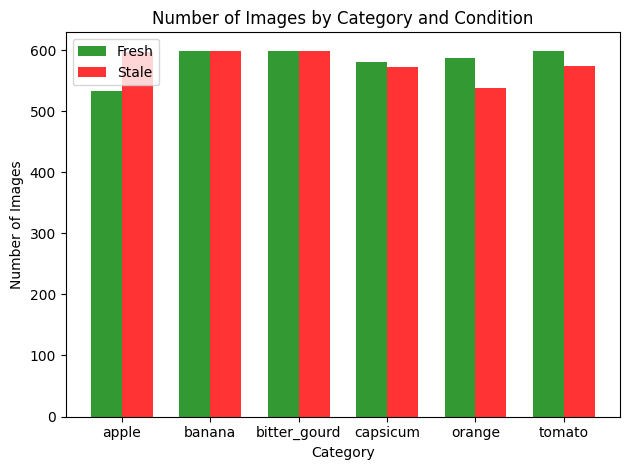

In [ ]:
source_path = 'VeggieVisionReady'

# Daftar jenis buah dan sayuran
categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
# Daftar kondisi
conditions = ['fresh', 'stale']

total_images = 0

# Dictionary untuk menyimpan jumlah gambar untuk setiap kategori dan kondisi
image_counts = {category: {'fresh': 0, 'stale': 0} for category in categories}

# Iterasi melalui setiap kondisi dan kategori
for condition in conditions:
    for category in categories:
        # Buat path untuk setiap direktori
        path = os.path.join(source_path, f"{condition}_{category}")
        # Hitung jumlah gambar dalam direktori
        count = len(os.listdir(path))
        # Tambahkan jumlah ke total
        total_images += count
        # Simpan jumlah gambar dalam dictionary
        image_counts[category][condition] = count
        # Tampilkan jumlah gambar dalam direktori
        print(f"There are {count} images of {condition} {category}")

# Tampilkan total gambar
print(f"Total number of images in the dataset: {total_images}")

# Menyiapkan data untuk grafik
categories = list(image_counts.keys())
fresh_counts = [image_counts[category]['fresh'] for category in categories]
stale_counts = [image_counts[category]['stale'] for category in categories]

x = range(len(categories))

# Membuat grafik
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(x, fresh_counts, bar_width, alpha=opacity, color='g', label='Fresh')
rects2 = plt.bar([p + bar_width for p in x], stale_counts, bar_width, alpha=opacity, color='r', label='Stale')

plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images by Category and Condition')
plt.xticks([p + bar_width / 2 for p in x], categories)
plt.legend()

plt.tight_layout()
plt.show()

Contoh dataset dari masing-masing class

Displaying images of fresh apple


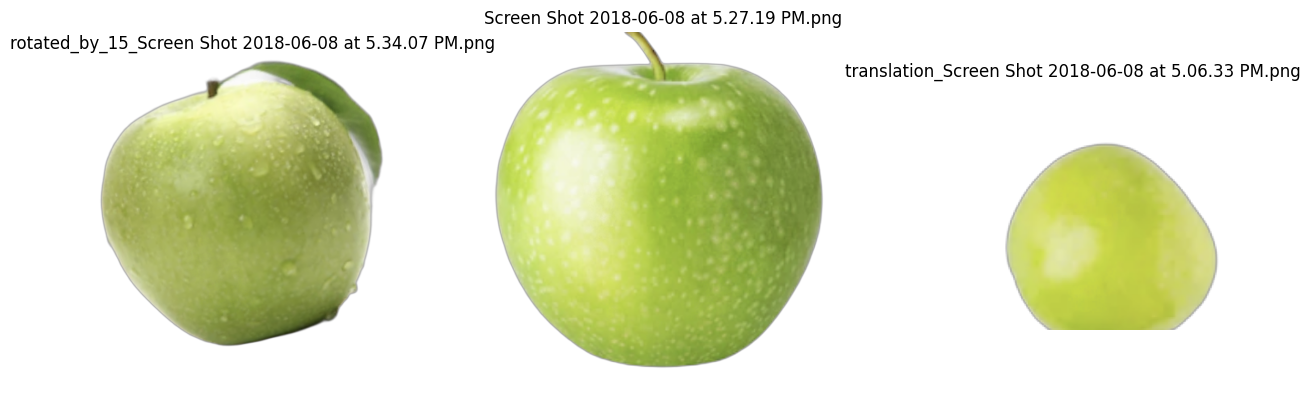

Displaying images of fresh banana


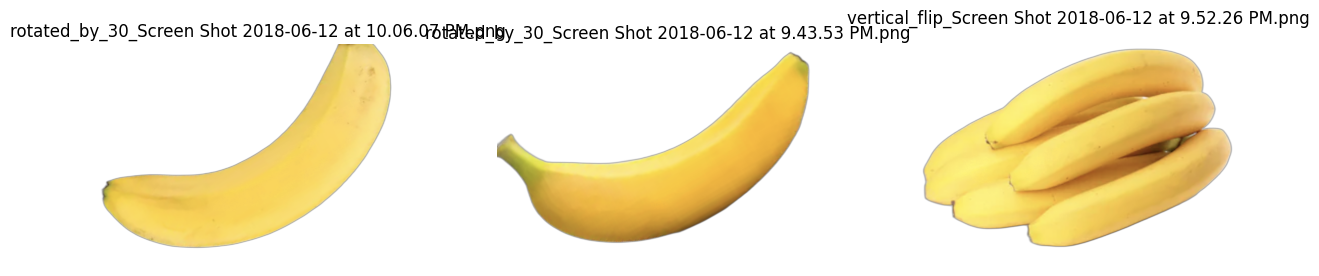

Displaying images of fresh bitter_gourd


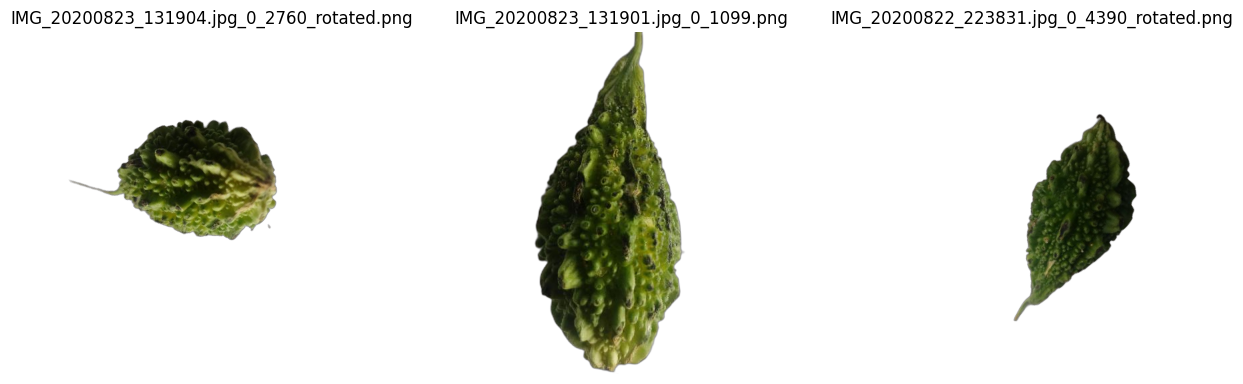

Displaying images of fresh capsicum


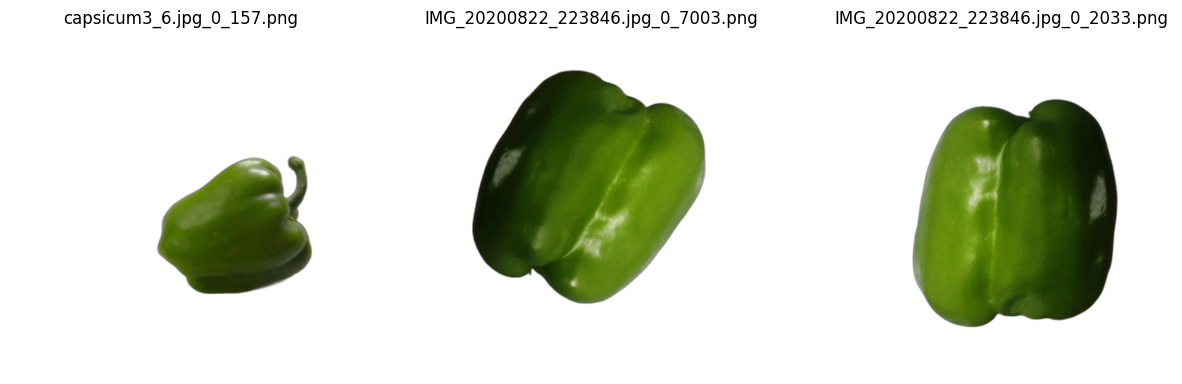

Displaying images of fresh orange


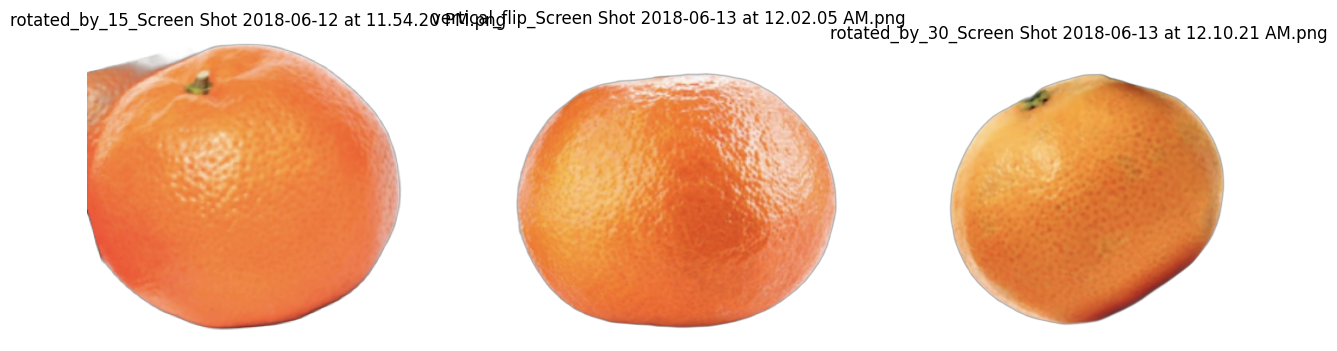

Displaying images of fresh tomato


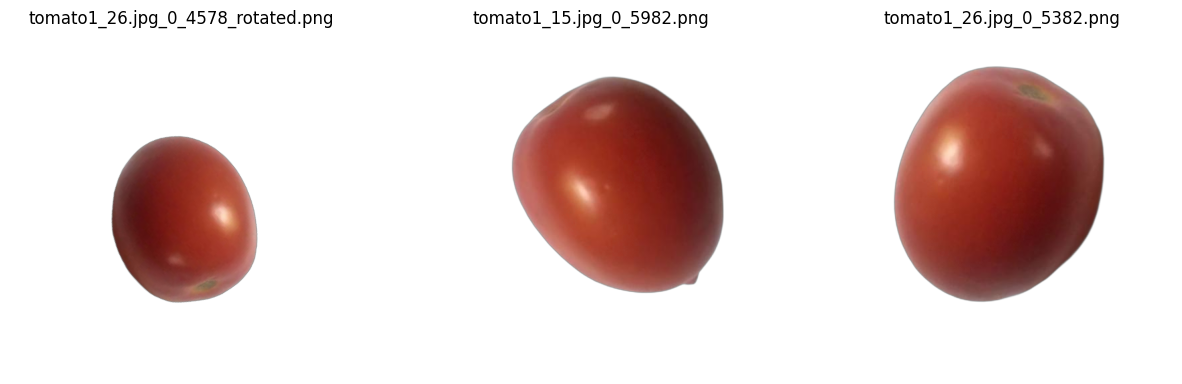

Displaying images of stale apple


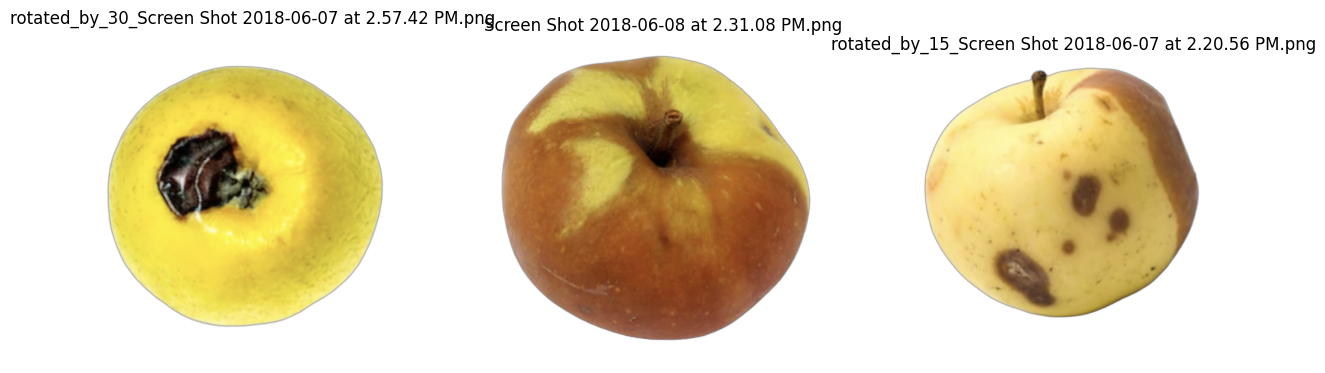

Displaying images of stale banana


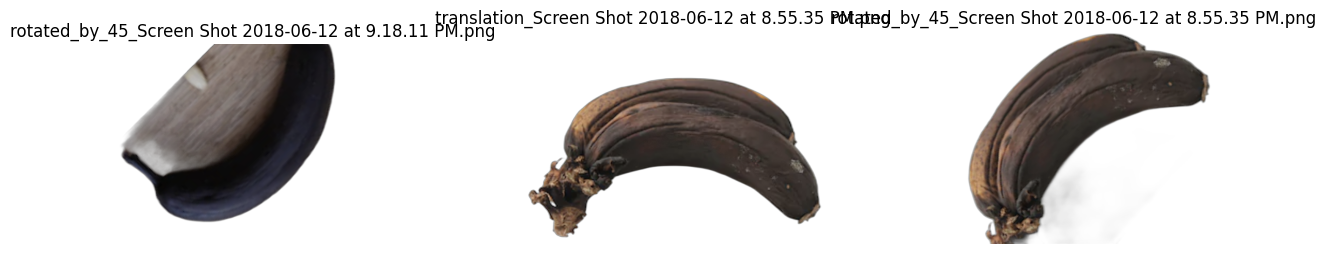

Displaying images of stale bitter_gourd


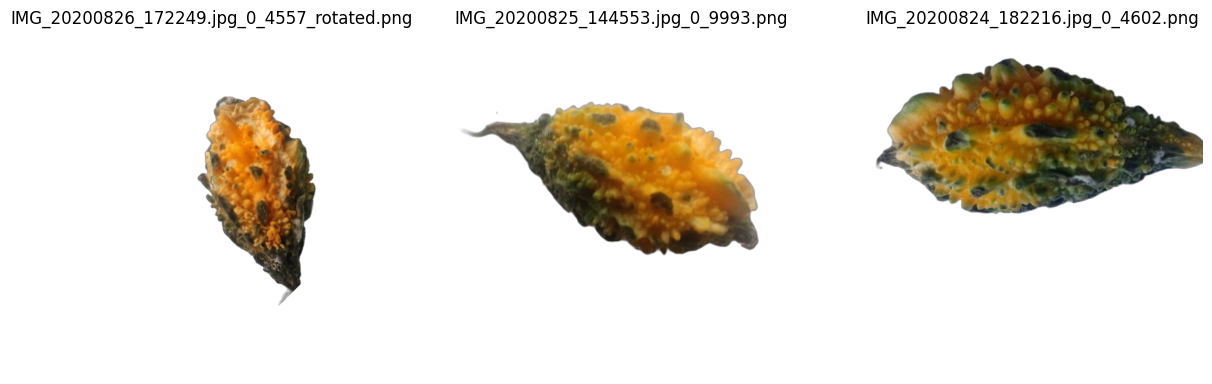

Displaying images of stale capsicum


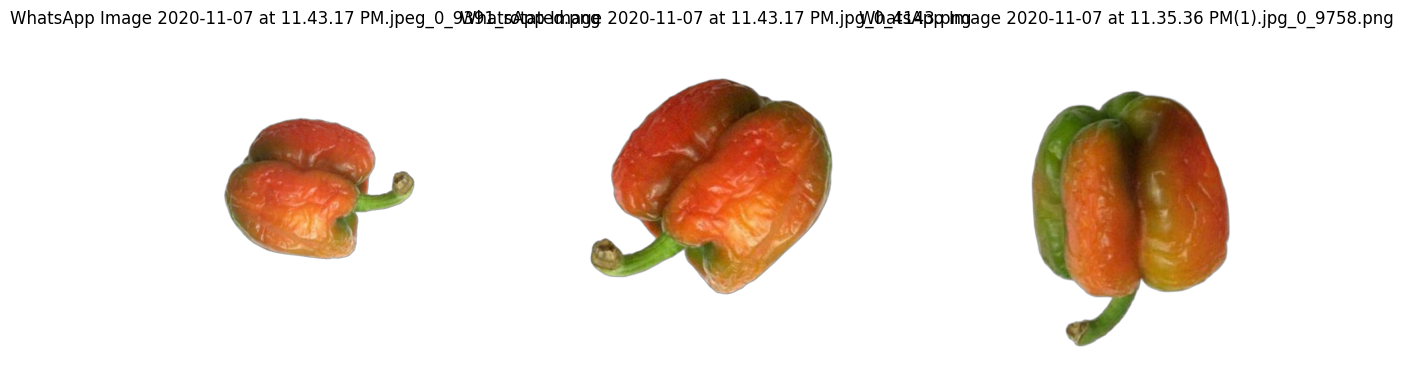

Displaying images of stale orange


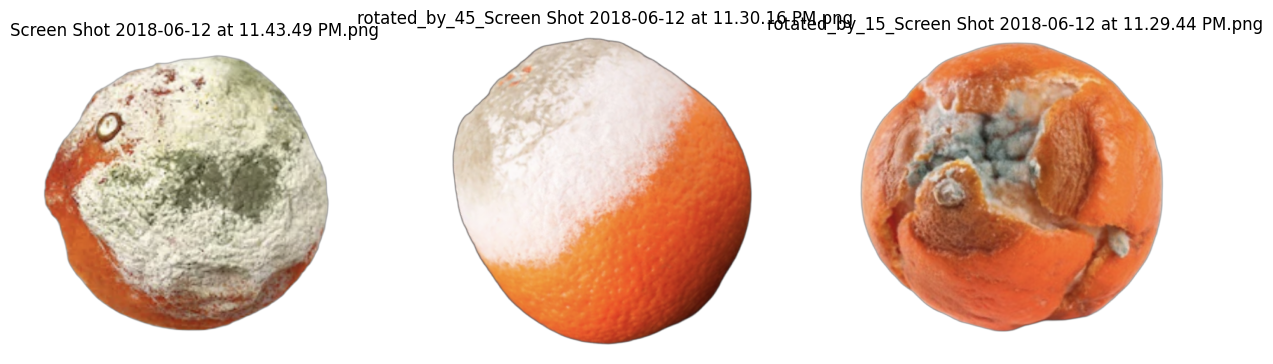

Displaying images of stale tomato


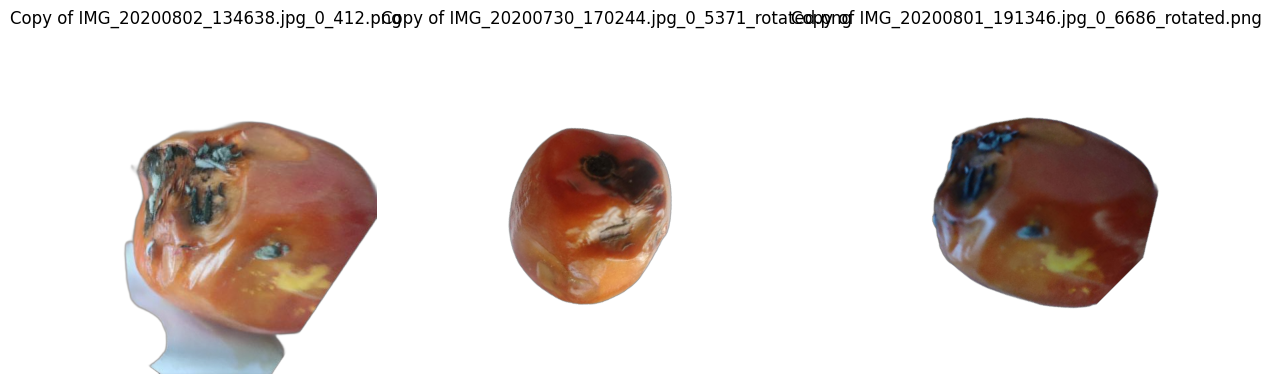

In [ ]:
# Path ke dataset
source_path = 'VeggieVisionReady'

# Daftar jenis buah dan sayuran
categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
# Daftar kondisi
conditions = ['fresh', 'stale']

# Jumlah gambar yang ingin ditampilkan per kelas
num_images_to_display = 3

# Fungsi untuk menampilkan gambar
def display_images_from_folder(folder_path, num_images):
    # Dapatkan daftar semua file dalam folder
    image_files = os.listdir(folder_path)
    # Pilih beberapa gambar untuk ditampilkan
    selected_files = image_files[:num_images]

    # Set ukuran plot
    plt.figure(figsize=(15, 5))

    # Tampilkan gambar
    for i, file_name in enumerate(selected_files):
        file_path = os.path.join(folder_path, file_name)
        img = Image.open(file_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(file_name)
        plt.axis('off')

    plt.show()

# Iterasi melalui setiap kondisi dan kategori
for condition in conditions:
    for category in categories:
        # Buat path untuk setiap direktori
        path = os.path.join(source_path, f"{condition}_{category}")
        # Tampilkan gambar dari direktori
        print(f"Displaying images of {condition} {category}")
        display_images_from_folder(path, num_images_to_display)

## Cleaning Dataset
Membersihkan dataset yang tidak valid atau tidak dapat dibuka

In [ ]:
# Path ke dataset
source_path = 'VeggieVisionReady'

# Daftar jenis buah dan sayuran
categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
# Daftar kondisi
conditions = ['fresh', 'stale']

# Fungsi untuk memeriksa apakah file gambar valid
def is_image_valid(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # Verifikasi file gambar
        return True
    except (IOError, SyntaxError) as e:
        print(f"Invalid image file: {image_path} - {e}")
        return False

# Iterasi melalui setiap kondisi dan kategori
for condition in conditions:
    for category in categories:
        # Buat path untuk setiap direktori
        path = os.path.join(source_path, f"{condition}_{category}")
        # Dapatkan daftar semua file dalam folder
        image_files = os.listdir(path)

        for file_name in image_files:
            file_path = os.path.join(path, file_name)
            # Periksa apakah file gambar valid
            if not is_image_valid(file_path):
                # Hapus file yang tidak valid
                os.remove(file_path)
                print(f"Removed invalid image file: {file_path}")

print("Data cleaning completed.")

Data cleaning completed.


Melakukan pemisahan dataset untuk ditraining dan untuk diuji coba

In [ ]:
# Path ke dataset
source_path = 'VeggieVisionReady'

# Path penyimpanan di Google Colab
destination_base_path = 'VeggieVisionSplit'
train_path = os.path.join(destination_base_path, 'train')
test_path = os.path.join(destination_base_path, 'test')

# Daftar jenis buah dan sayuran
categories = ['apple', 'banana', 'bitter_gourd', 'capsicum', 'orange', 'tomato']
# Daftar kondisi
conditions = ['fresh', 'stale']

# Buat direktori untuk set pelatihan dan pengujian
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Iterasi melalui setiap kondisi dan kategori
for condition in conditions:
    for category in categories:
        # Buat path untuk setiap direktori
        class_path = os.path.join(source_path, f"{condition}_{category}")
        # Dapatkan daftar semua file dalam folder
        image_files = os.listdir(class_path)

        # Pisahkan dataset menjadi train dan test dengan rasio 80/20
        train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

        # Buat path target untuk setiap kelas di set pelatihan dan pengujian
        train_class_path = os.path.join(train_path, f"{condition}_{category}")
        test_class_path = os.path.join(test_path, f"{condition}_{category}")
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        # Pindahkan file ke direktori pelatihan
        for file_name in train_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(train_class_path, file_name))

        # Pindahkan file ke direktori pengujian
        for file_name in test_files:
            shutil.move(os.path.join(class_path, file_name), os.path.join(test_class_path, file_name))

        # Tampilkan jumlah file yang ditraining dan dites untuk setiap kelas
        print(f"There are {len(train_files)} images of {condition} {category} to be trained, and {len(test_files)} images of {condition} {category} to be tested")

print("Dataset splitting completed.")

There are 426 images of fresh apple to be trained, and 107 images of fresh apple to be tested
There are 478 images of fresh banana to be trained, and 120 images of fresh banana to be tested
There are 479 images of fresh bitter_gourd to be trained, and 120 images of fresh bitter_gourd to be tested
There are 464 images of fresh capsicum to be trained, and 117 images of fresh capsicum to be tested
There are 469 images of fresh orange to be trained, and 118 images of fresh orange to be tested
There are 479 images of fresh tomato to be trained, and 120 images of fresh tomato to be tested
There are 476 images of stale apple to be trained, and 120 images of stale apple to be tested
There are 479 images of stale banana to be trained, and 120 images of stale banana to be tested
There are 479 images of stale bitter_gourd to be trained, and 120 images of stale bitter_gourd to be tested
There are 458 images of stale capsicum to be trained, and 115 images of stale capsicum to be tested
There are 43

## Build Model
Generator

In [ ]:
def train_val_generators(train_path, test_path):
    # Path ke dataset
    train_path = 'VeggieVisionSplit/train'
    test_path = 'VeggieVisionSplit/test'

    # Dimensi gambar
    img_width, img_height = 150, 150

    # Persiapan data generator
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, test_generator


In [ ]:
# Test your generators
train_generator, test_generator = train_val_generators(train_path, test_path)

Found 5576 images belonging to 12 classes.
Found 1400 images belonging to 12 classes.


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(512, activation='relu'),

        tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
    ])


    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    return model

## Training

In [ ]:
model = create_model()

# Train the model
history = model.fit(train_generator,
                    epochs=50,
                    #verbose=2,
                    validation_data=test_generator)

Epoch 1/50
175/175 [==============================] - 113s 635ms/step - loss: 0.8011 - accuracy: 0.7062 - val_loss: 0.2944 - val_accuracy: 0.9029
Epoch 2/50
175/175 [==============================] - 49s 279ms/step - loss: 0.2272 - accuracy: 0.9270 - val_loss: 0.2753 - val_accuracy: 0.9321
Epoch 3/50
175/175 [==============================] - 52s 295ms/step - loss: 0.1745 - accuracy: 0.9428 - val_loss: 0.2127 - val_accuracy: 0.9279
Epoch 4/50
175/175 [==============================] - 49s 280ms/step - loss: 0.1195 - accuracy: 0.9604 - val_loss: 0.2081 - val_accuracy: 0.9386
Epoch 5/50
175/175 [==============================] - 52s 296ms/step - loss: 0.1060 - accuracy: 0.9640 - val_loss: 0.1535 - val_accuracy: 0.9571
Epoch 6/50
175/175 [==============================] - 49s 282ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.1774 - val_accuracy: 0.9550
Epoch 7/50
175/175 [==============================] - 50s 288ms/step - loss: 0.0979 - accuracy: 0.9684 - val_loss: 0.1556 - val_a

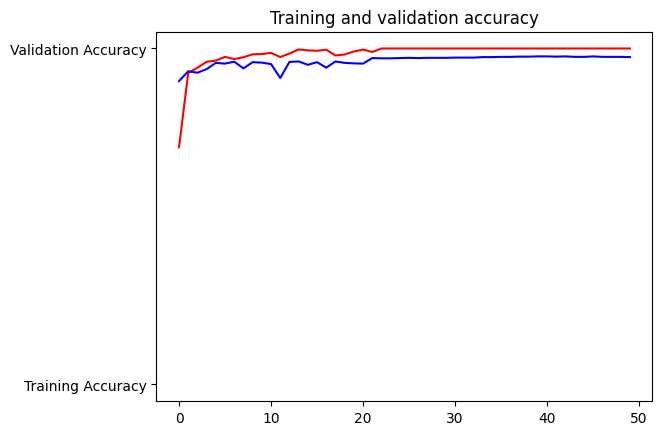

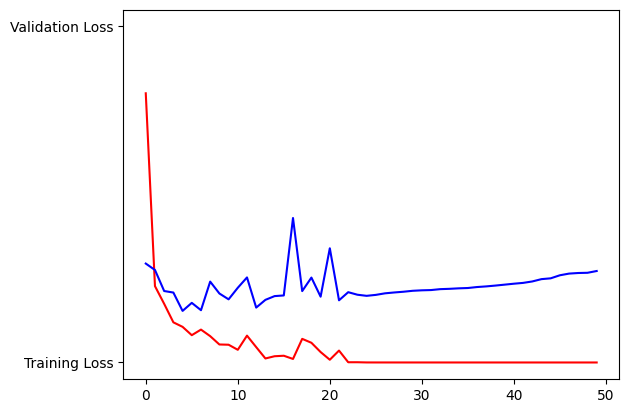

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
#Evaluasi model
test_loss, test_acc = model.evaluate(test_generator)
print('\nTest accuracy:', test_acc)

44/44 [==============================] - 10s 230ms/step - loss: 0.2722 - accuracy: 0.9743

Test accuracy: 0.9742857217788696


## Testing

In [ ]:
# Dimensi gambar
img_width, img_height = 150, 150

# Fungsi untuk melakukan prediksi pada gambar tunggal
def predict_image(model, img_path, img_width, img_height):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    confidence = np.max(prediction) * 100
    predicted_class = np.argmax(prediction, axis=1)
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}

    predicted_label = class_labels[predicted_class[0]]

    if 'fresh' in predicted_label:
        freshness_percentage = confidence
    else:
        freshness_percentage = 100 - confidence

    return predicted_label, freshness_percentage

# Path ke gambar baru
new_image_path = '/content/VeggieVisionSplit/test/stale_orange/rotated_by_15_Screen Shot 2018-06-12 at 11.30.48 PM.png'

# Lakukan prediksi pada gambar baru
predicted_label, freshness_percentage = predict_image(model, new_image_path, img_width, img_height)
print(f"Prediksi: {predicted_label} dengan persentase kesegaran {freshness_percentage:.2f}%")

1/1 [==============================] - 0s 18ms/step
Prediksi: stale_orange dengan persentase kesegaran 0.00%


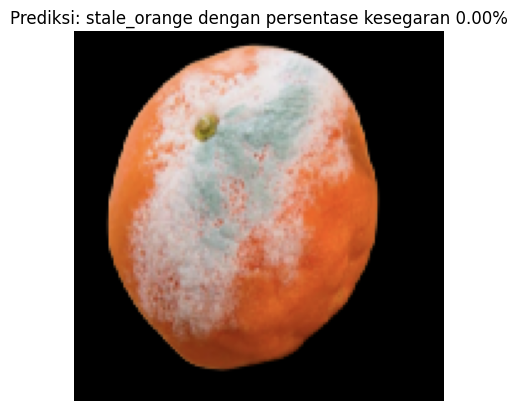

In [ ]:
# Tampilkan gambar dan hasil prediksi dengan kondisi persentase kesegaran
def display_prediction_with_freshness(img_path, predicted_label, freshness_percentage):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    plt.imshow(img)
    plt.title(f'Prediksi: {predicted_label} dengan persentase kesegaran {freshness_percentage:.2f}%')
    plt.axis('off')
    plt.show()

# Tampilkan hasil prediksi
display_prediction_with_freshness(new_image_path, predicted_label, freshness_percentage)

## Save The Model

In [ ]:
# Save the model you just trained
model.save("VeggieVision_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
